# LSTM Model to Predict 
# Flu Targets, Symptoms, and Location 
### 1 Week Ahead in Berlin

In [89]:
import numpy as np

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras.callbacks import ModelCheckpoint

#### Load the data

In [90]:
data = np.load('flu_timeseries_train2.npy')
labels = np.load('flu_timeseries_labels2.npy')

# Transpose for shape of LSTM requirements
data = data.T
labels = labels.T

print(data.shape)
print(labels.shape)

(891, 38)
(891, 38)


In [91]:
sequence = False
seq_length = 3

if sequence:
    blocks = np.zeros((data.shape[0]//seq_length,seq_length,42))
    for i in range(data.shape[0]//seq_length):
        blocks[i,:,:] = data[(i*seq_length):(seq_length+i*seq_length),:]
    blocks_labels = np.zeros((data.shape[0]//seq_length,38))
    for i in range(data.shape[0]//seq_length):
        blocks_labels[i,:] = labels[i*seq_length,:]
    
    print(blocks.shape)
    print(blocks_labels.shape)
    
    data = blocks
    labels = blocks_labels

In [92]:
# Reshape input to be [samples, time steps, features]
if not sequence:
    data = np.reshape(data, (data.shape[0], 1, data.shape[1]))
    print(data.shape)

(891, 1, 38)


In [93]:
# Get validation and test data
train_size = int(len(data) * .70)
print("Training size:", train_size, '\n')

# Input separation
train = data[:train_size]
valid = data[train_size:]
test = valid[len(valid)//2:]
valid = valid[:len(valid)//2] # take the test data out of valid

# Label separation
train_labels = labels[:train_size]
valid_labels = labels[train_size:]
test_labels = valid_labels[len(valid_labels)//2:]
valid_labels = valid_labels[:len(valid_labels)//2] # take the test data out of valid

print("Training shape:", train.shape)
print("Validation shape:", valid.shape)
print("Test shape:", test.shape)
print('')
print("Training labels shape:", train_labels.shape)
print("Validation labels shape:", valid_labels.shape)
print("Test labels shape:", test_labels.shape)

Training size: 623 

Training shape: (623, 1, 38)
Validation shape: (134, 1, 38)
Test shape: (134, 1, 38)

Training labels shape: (623, 38)
Validation labels shape: (134, 38)
Test labels shape: (134, 38)


#### LSTM
We create the LSTM and then train it

In [111]:
# HYPERPARAMETERS
DROPOUT_RATE = .5
LSTM_DROPOUT_RATE = 0

In [112]:
print(labels.shape[1])

38


In [113]:
# LSTM Model
model = Sequential()

model.add(LSTM(256, input_shape=(1, 38), activation='tanh', recurrent_activation='hard_sigmoid', 
               use_bias=True, kernel_initializer='glorot_uniform', 
               recurrent_initializer='orthogonal', bias_initializer='zeros', 
               dropout=LSTM_DROPOUT_RATE, recurrent_dropout=0.0, 
               stateful=False, unroll=False,
               return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, activation='tanh', recurrent_activation='hard_sigmoid', 
               use_bias=True, kernel_initializer='glorot_uniform', 
               recurrent_initializer='orthogonal', bias_initializer='zeros', 
               dropout=LSTM_DROPOUT_RATE, recurrent_dropout=0.0, 
               stateful=False, unroll=False))
model.add(Dropout(0.5))
model.add(Dense(labels.shape[1], activation='relu')) 

model.compile(loss='logcosh', optimizer='adam') # logcosh same as mse but better against outliers

In [114]:
filepath="./weights/weights-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [116]:
hist = model.fit(train, train_labels, epochs=200, batch_size=128,
          callbacks=callbacks_list, verbose=0, 
          validation_data=(valid, valid_labels))

Epoch 00001: loss did not improve
Epoch 00002: loss improved from 2.26302 to 2.25313, saving model to ./weights/weights-02-2.2531.hdf5
Epoch 00003: loss improved from 2.25313 to 2.24233, saving model to ./weights/weights-03-2.2423.hdf5
Epoch 00004: loss did not improve
Epoch 00005: loss did not improve
Epoch 00006: loss did not improve
Epoch 00007: loss improved from 2.24233 to 2.21523, saving model to ./weights/weights-07-2.2152.hdf5
Epoch 00008: loss improved from 2.21523 to 2.19867, saving model to ./weights/weights-08-2.1987.hdf5
Epoch 00009: loss did not improve
Epoch 00010: loss did not improve
Epoch 00011: loss improved from 2.19867 to 2.18077, saving model to ./weights/weights-11-2.1808.hdf5
Epoch 00012: loss did not improve
Epoch 00013: loss did not improve
Epoch 00014: loss did not improve
Epoch 00015: loss improved from 2.18077 to 2.17581, saving model to ./weights/weights-15-2.1758.hdf5
Epoch 00016: loss improved from 2.17581 to 2.15667, saving model to ./weights/weights-16

Epoch 00143: loss did not improve
Epoch 00144: loss did not improve
Epoch 00145: loss did not improve
Epoch 00146: loss improved from 1.77854 to 1.77205, saving model to ./weights/weights-146-1.7720.hdf5
Epoch 00147: loss did not improve
Epoch 00148: loss did not improve
Epoch 00149: loss did not improve
Epoch 00150: loss did not improve
Epoch 00151: loss did not improve
Epoch 00152: loss did not improve
Epoch 00153: loss did not improve
Epoch 00154: loss did not improve
Epoch 00155: loss did not improve
Epoch 00156: loss improved from 1.77205 to 1.76258, saving model to ./weights/weights-156-1.7626.hdf5
Epoch 00157: loss did not improve
Epoch 00158: loss did not improve
Epoch 00159: loss did not improve
Epoch 00160: loss did not improve
Epoch 00161: loss did not improve
Epoch 00162: loss did not improve
Epoch 00163: loss did not improve
Epoch 00164: loss improved from 1.76258 to 1.75712, saving model to ./weights/weights-164-1.7571.hdf5
Epoch 00165: loss did not improve
Epoch 00166: l

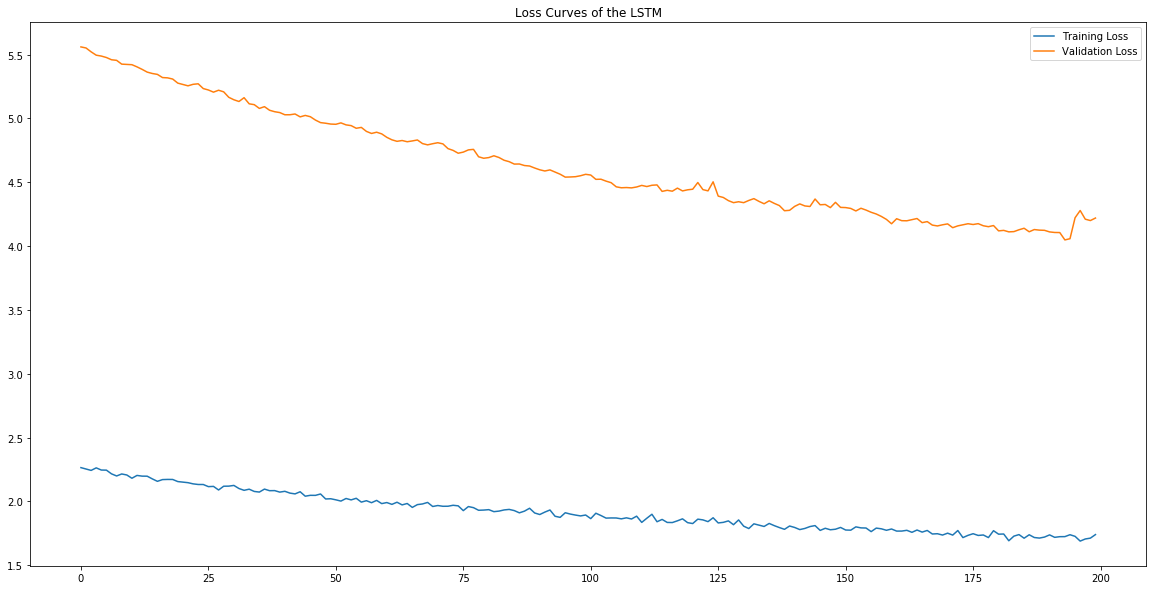

In [117]:
plt.figure(figsize=(20,10))
plt.title("Loss Curves of the LSTM")
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [118]:
#TESTETASL:
# print(len(test))
# print(test[0])
# print(test[0].shape)
# print(np.expand_dims(test[0], axis=1).shape)

In [119]:
predictions = []
for i in range(len(test)):
    predictions.append(model.predict(np.expand_dims(test[i], axis=1)))
predictions = np.asarray(predictions)
# print(predictions.shape)

In [120]:
# print(test_labels[5:10])
# print(test_labels[:,-1])
# print(test_labels.shape)
predictions = np.reshape(predictions, test_labels.shape)
# print(predictions.shape)

np.savetxt('test', test_labels, delimiter=',')
np.savetxt('pred', predictions, delimiter=',')

In [121]:
# print(len(test_labels[:,0]))
# print(len(predictions[:,0]))

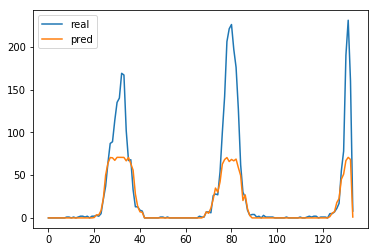

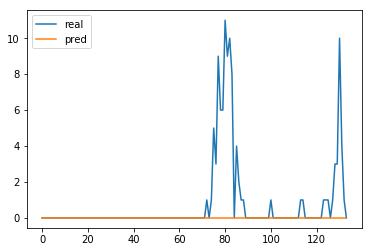

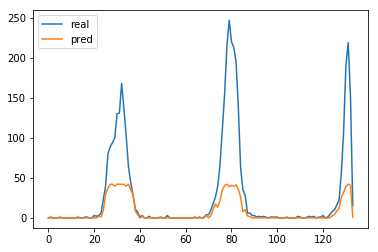

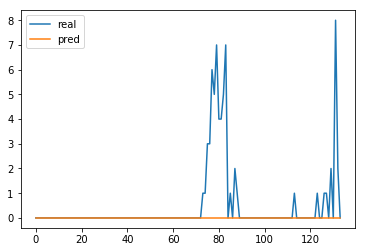

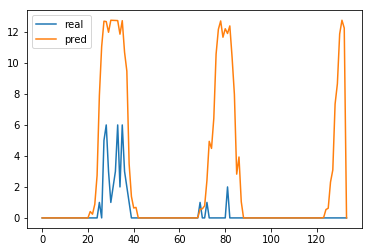

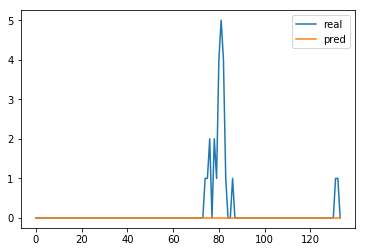

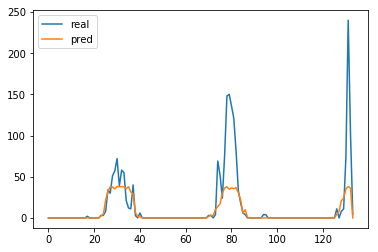

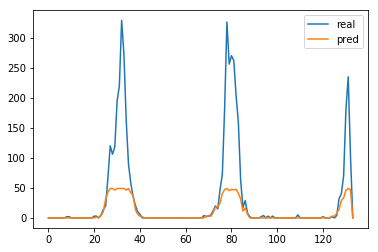

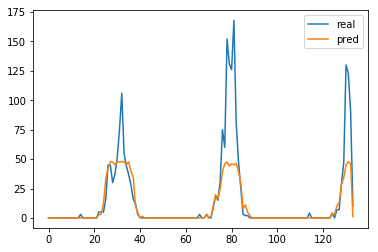

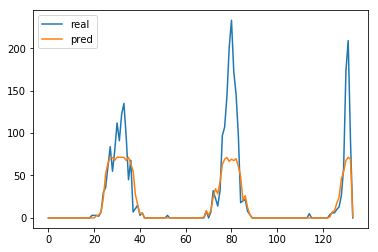

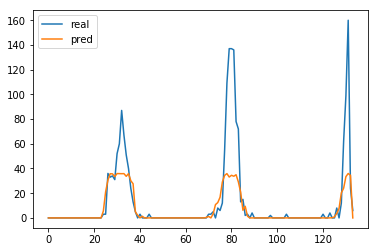

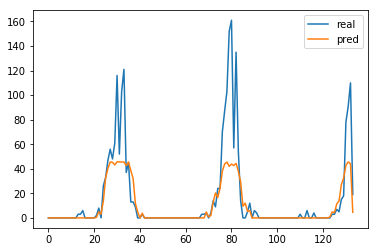

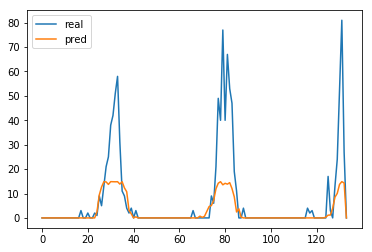

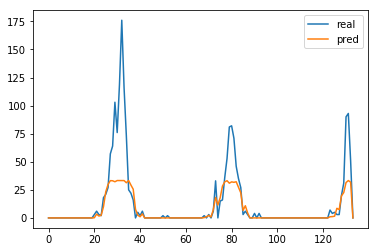

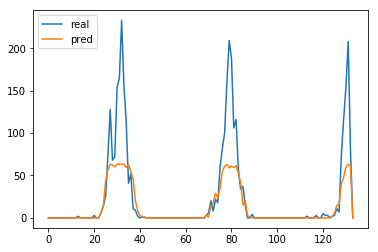

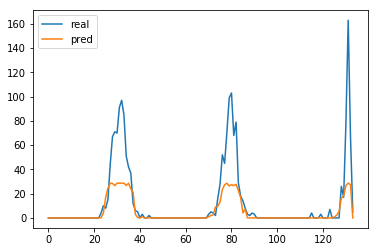

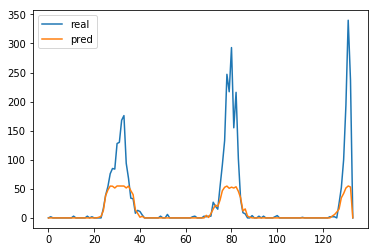

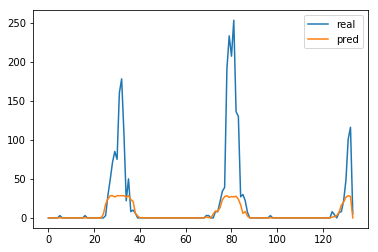

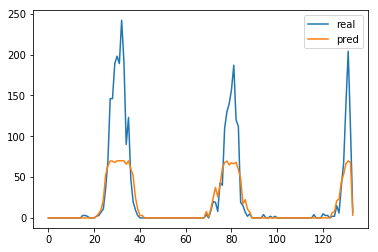

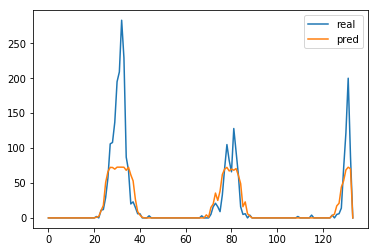

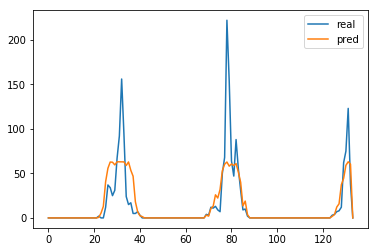

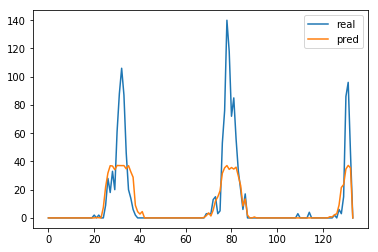

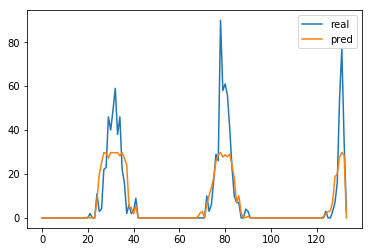

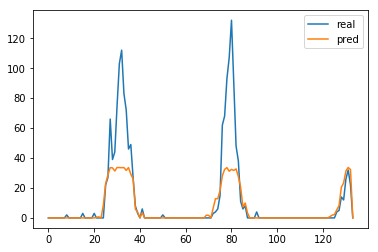

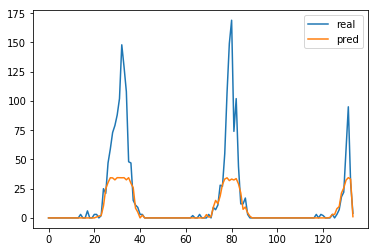

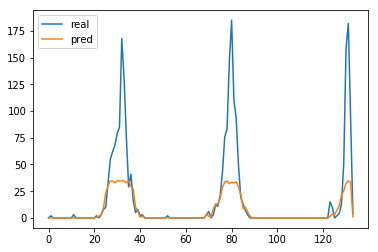

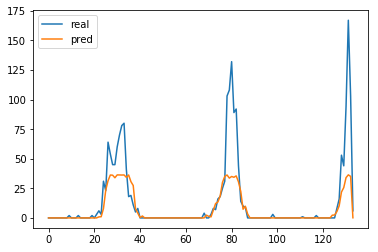

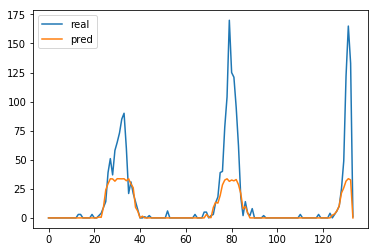

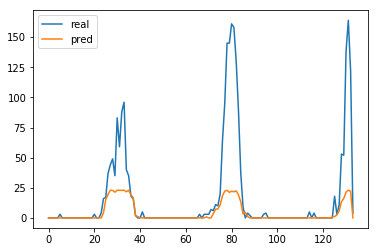

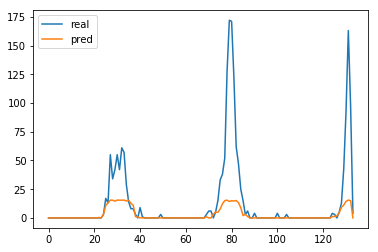

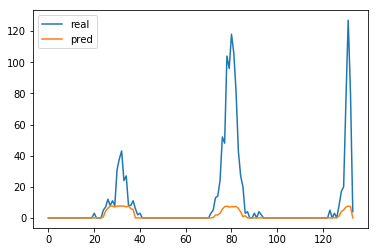

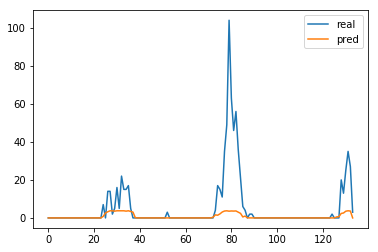

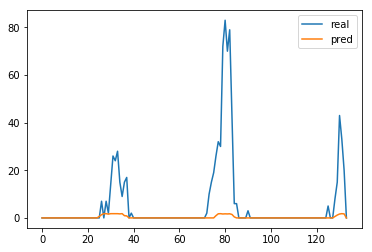

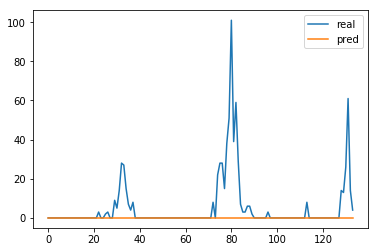

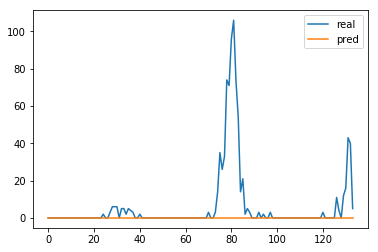

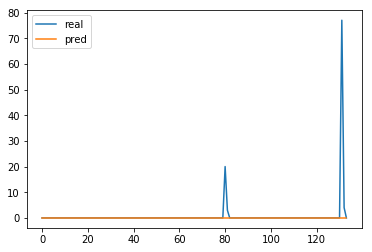

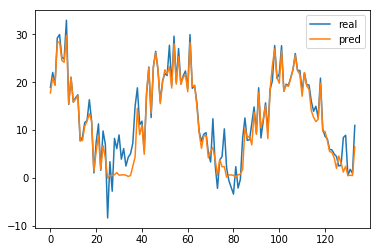

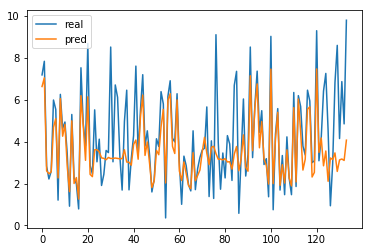

In [122]:
import matplotlib.pyplot as plt


for i in range(38):
    real = test_labels[:,i]
    pred = predictions[:,i]
    
    plt.plot(real, label='real')
    plt.plot(pred, label='pred')
    
    plt.legend()
    plt.show()

In [ ]:
# WIP

age  = ['A00..04','A05..09', 'A10..14',
        'A15..19','A20..24',
        'A25..29','A30..34',
        'A35..39','A40..44','A45..49','A50..54',
        'A55..59','A60..64',
        'A65..69','A70..74','A75..79',
        'A80+','Unbekannt']

berlin = ['SK Berlin Spandau',
                    'SK Berlin Pankow','SK Berlin Reinickendorf',
                    'SK Berlin Steglitz-Zehlendorf',
                    'SK Berlin Treptow-Köpenick'
                    'SK Berlin Mitte','SK Berlin Lichtenberg',
                    'SK Berlin Friedrichshain-Kreuzberg',
                    'SK Berlin Charlottenburg-Wilmersdorf',
                    'SK Berlin Neukölln',
                    'SK Berlin Tempelhof-Schöneberg',
                    'SK Berlin Marzahn-Hellersdorf']

symptom_names = ['Fieber', 'Husten', 
                 'Muskel-, Glieder-, Rücken- oder Kopfschmerzen', 
                 'Pneumonie (Lungenentzündung)', 'akuter Krankheitsbeginn', 
                 'akutes schweres Atemnotsyndrom (ARDS)', 'andere Symptome', 
                 'beatmungspflichtige Atemwegserkrankung']

plot_titles = []
for 